In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import xarray as xr
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import cartopy as cart
import cmocean

from glob import glob
from datetime import timedelta as delta
from datetime import datetime

from importlib import reload
import sys
sys.path.append('/home/students/4302001/arctic-connectivity/tools')
#sys.path.append('/Users/daanreijnders/surfdrive/Thesis/repo/tools')
import plot
import lifeline

In [2]:
reload(plot)
reload(lifeline)

<module 'lifeline' from '/home/students/4302001/arctic-connectivity/tools/lifeline.py'>

In [22]:
# Specify paths to velocity field and mesh
readdir_ice_control = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ice/arctic/'
readdir_ice_rcp = '/data/oceanparcels/input_data/CESM/0.1_deg/rcp8.5/ice/arctic/'
readdir_ocean_control = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ocean/arctic/'
readdir_ocean_rcp = '/data/oceanparcels/input_data/CESM/0.1_deg/rcp8.5/ocean/arctic/'
readdir_mesh = '/scratch/DaanR/fields/'

meshfile = 'POP_grid_lat1800plus.nc'

fieldfile_ice_rcp1 = 'monthly_icefields_CESM_0.1degree_rcp8.5run_year_2000-2010_arctic.nc'
fieldfile_ice_rcp2 = 'monthly_icefields_CESM_0.1degree_rcp8.5run_year_2011-2020_arctic.nc'

fieldfile_ocean_rcp1 = 'daily_CESM_0.1degree_rcp8.5run_years_2000-2010_arctic.nc'
fieldfile_ocean_rcp2 = 'daily_CESM_0.1degree_rcp8.5run_years_2011-2020_arctic.nc'

writedir = ''

In [23]:
meshdata = xr.open_dataset(readdir_mesh+meshfile)

In [26]:
icedata = xr.open_dataset(readdir_ice_rcp+fieldfile_ice_rcp1)
oceandata = xr.open_dataset(readdir_ocean_rcp+fieldfile_ocean_rcp1)

In [54]:
U = oceandata.UVEL_5m[:,0,:,:]
V = oceandata.VVEL_5m[:,0,:,:]
conc = icedata.aice[:,:,:]
thick = icedata.hi[:,:,:]
volume = icedata.hisnap[:,:,:]

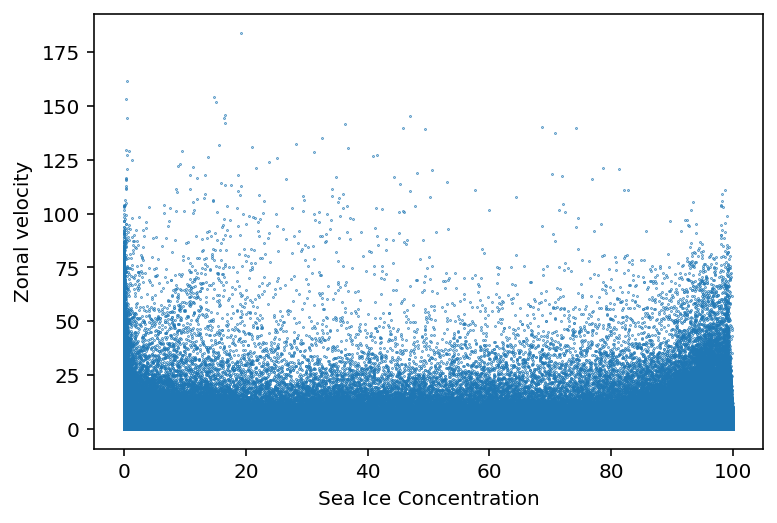

In [45]:
plt.scatter(conc[0,:,:], np.abs(U[25,:,:]), s=0.1)
plt.xlabel('Sea Ice Concentration')
plt.ylabel('Zonal velocity')
plt.show()

In [50]:
icedata.aice[0,:,:].max()

<xarray.DataArray 'aice' ()>
array(99.9985, dtype=float32)
Coordinates:
    time     object 2000-02-01 00:00:00

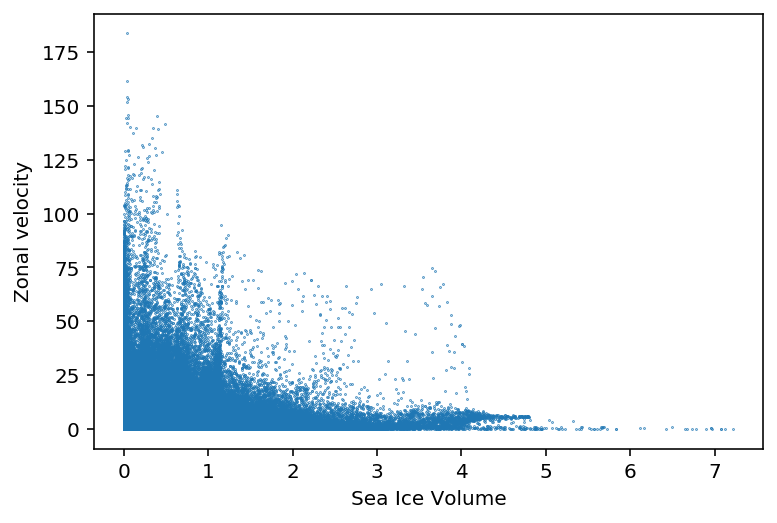

In [55]:
plt.scatter(volume[0,:,:], np.abs(U[25,:,:]), s=0.1)
plt.xlabel('Sea Ice Volume')
plt.ylabel('Zonal velocity')
plt.show()

In [78]:
(np.sum(icedata.hisnap[0,:,:]>3)/len(icedata.hisnap[0,:,:].data.flatten())).values

array(0.00111944)

In [77]:
(np.sum(icedata.hisnap[8,:,:]>3)/len(icedata.hisnap[0,:,:].data.flatten())).values

array(7.73148148e-05)

In [80]:
(np.sum(icedata.aice[0,:,:]>99)/len(icedata.aice[0,:,:].data.flatten())).values

array(0.05584583)

In [79]:
(np.sum(icedata.aice[8,:,:]>99)/len(icedata.aice[0,:,:].data.flatten())).values

array(2.5e-05)

Although a clear relation between sea ice concentration and thickness is not immediately clear, we see that sea ice thickness drops with sea ice thickness. 

USE LANDMASK